<font size=5, color='blue'>NLTK (Natural Language Toolkit)

is a comprehensive library for working with human language data (text). It's widely used for tasks like text processing, tokenization, stemming, lemmatization, parsing, part-of-speech tagging, and building text classifiers.


<font size=5, color='blue'>Wordcloud

is a library that helps generate a visual representation of the most frequent words in a text dataset. Words that appear more frequently are shown larger in the word cloud.

In [1]:
# @title $Install \ \ Required \ \ Libraries$
!pip install nltk &> /dev/null
print('nltk installed')

!pip install wordcloud &> /dev/null
print('wordcloud installed')

!pip install imblearn &> /dev/null
print('imblearn installed')

!pip install contractions &> /dev/null
print('contractions installed')

nltk installed
wordcloud installed
imblearn installed
contractions installed


In [2]:
# @title $Upload \ \ CSV \ \ file$
import pandas as pd  # For data processing and reading CSV files

df = pd.read_csv('resume_data.csv')
display(df)

,Resume,Category
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft resumes
1,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft resumes
2,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes
...,...,...
74,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,workday resumes
75,Madeeswar A\n\n\t\n\n\t\t\t\n\n\t\t\t\tPROFILE...,workday resumes
76,Shireesh Balasani ...,workday resumes
77,Workday Integration Consultant\n\n\n\nName ...,workday resumes


In [3]:
# @title $Data \ \ Statistic$
print('1) Info:')
display(df.info())
print('------------------------------------------------------------------')
print('2) Duplicate Records:',df.duplicated().sum())
print('------------------------------------------------------------------')
print('3) Description:')
display(df.describe(include='object'))
print('------------------------------------------------------------------')
print('4) Categories:',df['Category'].unique())

1) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


None

------------------------------------------------------------------
2) Duplicate Records: 0
------------------------------------------------------------------
3) Description:


,Resume,Category
count,79,79
unique,79,4
top,Hari Narayana \t\t \n\n\t\n\n\n\n...,Reactjs resumes
freq,1,24


------------------------------------------------------------------
4) Categories: ['Peoplesoft resumes' 'Reactjs resumes' 'SQL resumes' 'workday resumes']


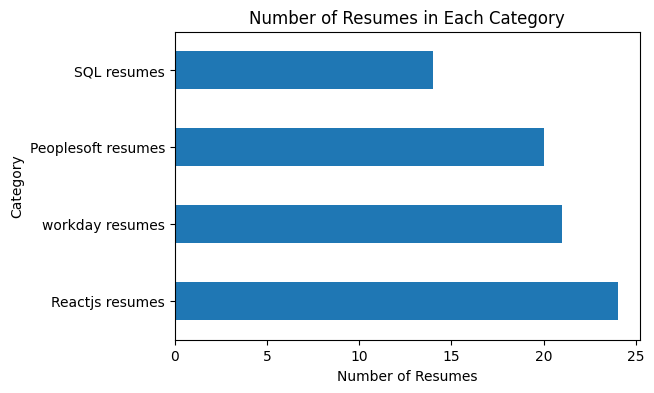

In [4]:
# @title $Bar \ \ Plot$
import matplotlib.pyplot as plt  # For plotting graphs

# Set the size of the plot
plt.figure(figsize=(6,4))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="barh")

# Set the labels for the x and y axes
plt.xlabel("Number of Resumes")
#plt.ylabel("Category")
plt.title("Number of Resumes in Each Category")
# Display the plot
plt.show()

In [5]:
# @title $Text \ \ Preprocessing$
import re  # For performing regular expression operations like pattern matching and text manipulation
import string  # Provides a collection of string constants and functions (e.g., punctuation handling)

import nltk  # Natural Language Toolkit, used for NLP tasks like tokenization, stemming, etc.
from nltk.corpus import stopwords  # For removing common stopwords (e.g., 'the', 'is', etc.) from text data
from nltk import word_tokenize  # For tokenizing text data into individual words
#from nltk.tokenize import TweetTokenizer  # For tokenizing tweets, handling specific features like hashtags and emoticons
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization
import contractions  # For expanding contractions like "can't" to "cannot"

# Download necessary NLTK resources
nltk.download('punkt')  # Download tokenizer
nltk.download('stopwords')  # Download list of stopwords
nltk.download('wordnet')  # Download WordNet for lemmatization

# Initialize NLP tools
stop_words = set(stopwords.words('english'))  # Set of English stopwords
stemmer = PorterStemmer()  # Initialize a PorterStemmer object for stemming
lemmatizer = WordNetLemmatizer()  # Initialize a WordNetLemmatizer object for lemmatization

# Define a function to process text
def preprocess_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = contractions.fix(text)  # Expand contractions (e.g., "don't" -> "do not")
        text = text.lower()  # Convert all characters to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs from the text
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters (anything that's not a letter or space)
        text = " ".join(text.split())  # Remove extra whitespaces
        tokens = word_tokenize(text)  # Tokenize the text (split into individual words)
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords (common words like "the", "is")
        tokens = [stemmer.stem(word) for word in tokens]  # Perform stemming (reduce words to their root form)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Perform lemmatization (normalize words to their base form)
        tokens = [word for word in tokens if len(word) > 1]  # Remove single-letter words

        return tokens  # Return the processed tokens
    return text  # Return the original text if it's not a string

data = df.copy() # Make a copy of dataframe
# Apply the preprocessing function to the 'Resume' column in the DataFrame
data['Resume'] = data['Resume'].apply(preprocess_text)

data.head()  # Show the first few rows of the processed data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Resume,Category
0,"[hari, narayana, profession, summari, year, ex...",Peoplesoft resumes
1,"[murali, profession, summari, year, experi, pe...",Peoplesoft resumes
2,"[peoplesoft, administr, vivekanand, sayana, ca...",Peoplesoft resumes
3,"[classif, intern, classif, intern, murali, exp...",Peoplesoft resumes
4,"[sirazuddin, bangalor, india, sirazuddin, bang...",Peoplesoft resumes


In [6]:
# @title $frequent \ \ words$
from collections import defaultdict, Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

category_words = defaultdict(list)    # Initialize a defaultdict to store words for each category

# Iterate through the DataFrame and append words to the corresponding category
for _, row in data.iterrows():
    category_words[row['Category']].extend(row['Resume'])

# Print words and display top words for each category
for category, words in category_words.items():
    print(f"Category: {category}")
    word_count = Counter(words)    # Count word frequency
    top_words = word_count.most_common(10)    # Display top 10 most common words
    print(f"Top 10 words: {top_words}")
    print("-" * 66)

Category: Peoplesoft resumes
Top 10 words: [('peoplesoft', 415), ('server', 388), ('applic', 378), ('experi', 228), ('databas', 204), ('process', 157), ('configur', 143), ('environ', 140), ('project', 137), ('tool', 137)]
------------------------------------------------------------------
Category: Reactjs resumes
Top 10 words: [('develop', 170), ('use', 138), ('react', 119), ('experi', 102), ('work', 101), ('project', 98), ('design', 93), ('html', 86), ('respons', 76), ('technolog', 74)]
------------------------------------------------------------------
Category: SQL resumes
Top 10 words: [('sql', 188), ('data', 122), ('develop', 120), ('use', 107), ('server', 106), ('experi', 103), ('report', 97), ('tabl', 75), ('databas', 72), ('creat', 69)]
------------------------------------------------------------------
Category: workday resumes
Top 10 words: [('workday', 428), ('report', 333), ('integr', 303), ('work', 226), ('creat', 186), ('busi', 186), ('use', 173), ('experi', 172), ('develop

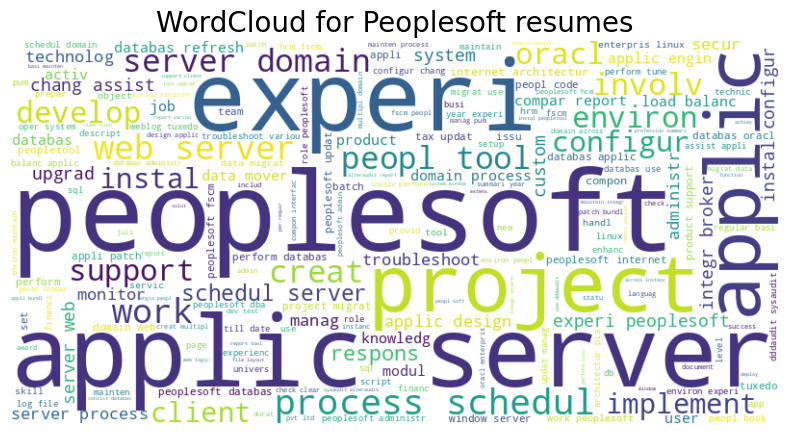

----------------------------------------------------------------------------------------------------


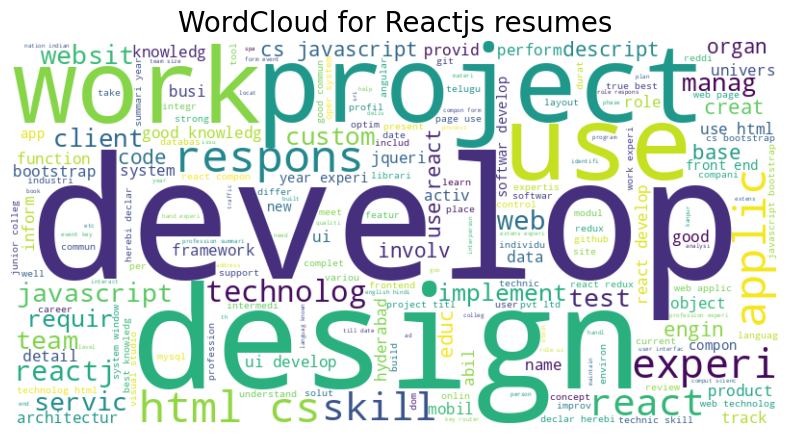

----------------------------------------------------------------------------------------------------


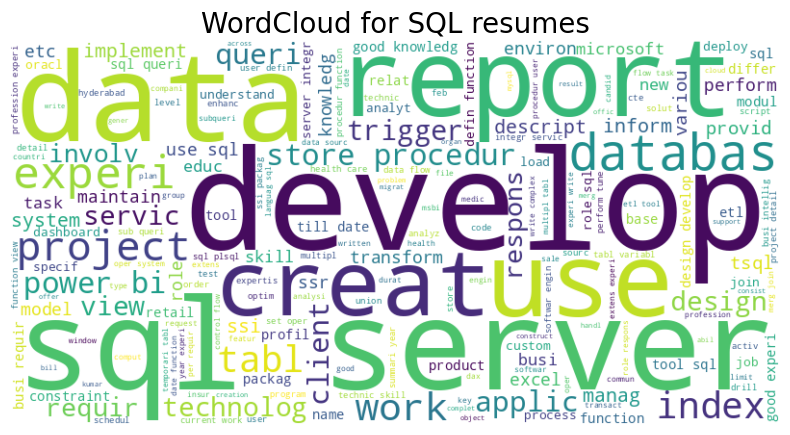

----------------------------------------------------------------------------------------------------


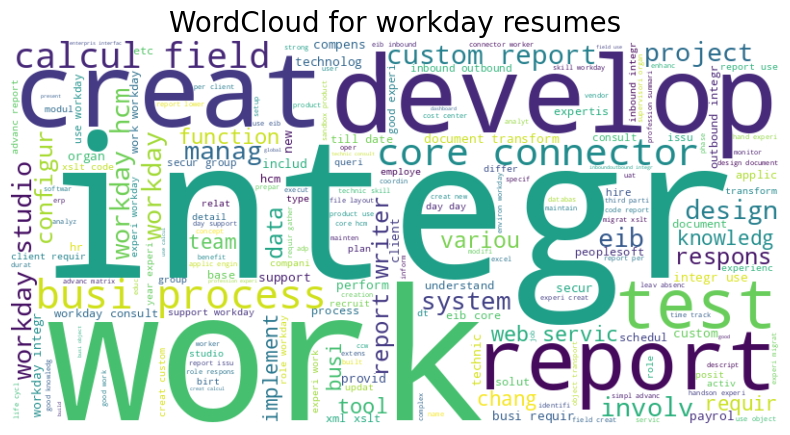

----------------------------------------------------------------------------------------------------


In [7]:
# @title $WorldCloud$
# Generate and display WordCloud for each category
from wordcloud import WordCloud  # For generating visual word clouds from text data

for category, words in category_words.items():
    text = " ".join(words)

    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot WordCloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {category}", fontsize=20)
    plt.tight_layout()
    plt.show()
    print("-" * 100)

In [8]:
# @title $Create \ \ DataFrame \ \ using \ \ CountVectorizer$
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join the processed tokens into a single string for each resume
data['Resume_text'] = data['Resume'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer with options to normalize the text
vectorizer = CountVectorizer(strip_accents='unicode', lowercase=True)

# Fit the vectorizer and transform the text into a sparse matrix
X = vectorizer.fit_transform(data['Resume_text'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the sparse matrix (for display purposes)
df_bow = pd.DataFrame(X.toarray(), columns=feature_names)

# Display the BoW DataFrame (show a sample if too large)
display(df_bow.head())  # Show the first 5 rows

,aa,ab,abdul,abil,abilitiescommun,abl,abovement,abreast,absenc,absent,...,young,youp,yoursincer,yr,zealand,zenefit,zero,zerozilla,zone,zp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# @title $Create \ \ DataFrame \ \ using \ \ TfidfVectorizer$
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer with some options for better text normalization
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', lowercase=True, min_df=2, max_df=0.90, max_features=1000)

# Fit and transform the 'Resume_text' column into a sparse TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Resume_text'])

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the sparse matrix to a DataFrame for better readability (only if necessary)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display a sample of the TF-IDF DataFrame (first 5 rows)
display(df_tfidf.head())

,abil,absenc,academ,accentur,accept,access,accord,account,achiev,across,...,workstat,world,would,write,writer,written,xml,xp,xpath,xslt
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.052094,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.052854,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.030302,0.0,0.0,0.007189,0.008077,0.025301,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.040858,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.074868,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# @title $Train-Test \ \ Split$
from sklearn.model_selection import train_test_split

X = df_tfidf
y = data['Category'].map({'Peoplesoft resumes':0, 'Reactjs resumes':1, 'SQL resumes':2, 'workday resumes':3})
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_tfidf,  # Features (TF-IDF matrix)
    y,  # Target variable (categories)
    test_size=0.2,  # 20% of the data for testing
    random_state=42  # Set a random state for reproducibility
)

In [11]:
# @title $Function \ \ to \ \ Apply \ \ Model$
def apply_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f"1) Train Accuracy : {model.score(X_train,y_train)}")

    print(f"2) Test Accuracy : {model.score(X_test,y_test)}")

    print('3) Classification Report :')
    print(classification_report(y_test,y_pred))

    print()
    print('4) Confusion Matrix :')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)

    return (model.score(X_train,y_train), model.score(X_test,y_test))

In [12]:
# @title $Function \ \ to \ \ Evaluate \ \ Models$
from imblearn.over_sampling import RandomOverSampler
import numpy as np
def stratified_cv(model, X, y, shuffle=False, n_folds=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=shuffle, random_state=random_state)
    lst_accu_stratified = []

    # Convert DataFrame to NumPy array
    X_array = X.values

    for train_index, test_index in skf.split(X_array, y): # Use X_array for splitting
        X_train_fold, X_test_fold = X_array[train_index], X_array[test_index] # Index the NumPy array
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] # Use iloc to index the Series
        X_over, y_over = oversample.fit_resample(X_train_fold, y_train_fold)
        model.fit(X_train_fold, y_train_fold)
        lst_accu_stratified.append(model.score(X_test_fold, y_test_fold))

    # Print the output.
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:', np.mean(lst_accu_stratified)*100, '%')
    print('\nStandard Deviation is:', np.std(lst_accu_stratified))

    return np.mean(lst_accu_stratified)*100

In [13]:
# @title $Function \ \ to \ \ Perform \ \ Hyperparameter \ \ Tunning$
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
def hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test):
    rf_random = GridSearchCV(model, random_grid, cv=10, verbose = 10)
    rf_random.fit(X_train, y_train)
    y_pred = rf_random.predict(X_test)
    print(f"1) Train Accuracy : {rf_random.score(X_train,y_train)}")
    print(f"2) Test Accuracy : {rf_random.score(X_test,y_test)}")
    print('3) Classification Report')
    print(classification_report(y_test,y_pred))
    print("4) Best Score :", rf_random.best_score_)
    print("5) Best Parameters :",rf_random.best_params_)
    print(f"6) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")
    return rf_random

In [14]:
# @title $Oversampling$
# Oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
print("Oversampled class distribution:", Counter(y_over))

Oversampled class distribution: Counter({3: 18, 2: 18, 1: 18, 0: 15})


# $1 : Naive \ \ Bayes \ (MultinomialNB)$

In [15]:
# @title $Model$
from sklearn.naive_bayes import MultinomialNB

dict_model_Acc = {}

model1 = MultinomialNB()
train_acc, test_acc = apply_model(model=model1, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [16]:
# @title $Cross \ \ Validation$

from sklearn.model_selection import StratifiedKFold
overall_acc = stratified_cv(MultinomialNB(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9375, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 93.75 %

Overall Accuracy: 98.75 %

Standard Deviation is: 0.024999999999999998


In [17]:
# @title $Hyperparameters \ \ Tunning$

model = MultinomialNB()
random_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
               'fit_prior': [True, False],
               'class_prior': [None],
               'force_alpha': [True, False]
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True
[CV 1/10; 1/24] END alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True;, score=1.000 total time=   0.2s
[CV 2/10; 1/24] START alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True
[CV 2/10; 1/24] END alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True;, score=1.000 total time=   0.1s
[CV 3/10; 1/24] START alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True
[CV 3/10; 1/24] END alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True;, score=1.000 total time=   0.2s
[CV 4/10; 1/24] START alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True
[CV 4/10; 1/24] END alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True;, score=1.000 total time=   0.1s
[CV 5/10; 1/24] START alpha=0.001, class_prior=None, fit_prior=True, force_alpha=True
[CV 5/10; 1/24] END alpha=0.001, class_

In [18]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameter \ \ Tunning$
overall_acc = stratified_cv(MultinomialNB(alpha =0.001, class_prior = None, fit_prior = False, force_alpha = True),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [0.9375, 0.9375, 1.0, 1.0, 0.9333333333333333]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 93.33333333333333 %

Overall Accuracy: 96.16666666666667 %

Standard Deviation is: 0.03133599279493861


In [19]:
# @title $Final \ Naive \ Bayes \ Model$

model1 = MultinomialNB(alpha =0.001, class_prior = None, fit_prior = False, force_alpha = True)
train_acc, test_acc = apply_model(model=model1, X_train=X, y_train=y)

dict_model_Acc['Naive Bayes'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


# $2 : Support \ \ Vector \ \ Classifier$

In [20]:
# @title $Model$
from sklearn.svm import SVC
model2 = SVC(random_state=42)
train_acc, test_acc = apply_model(model=model2, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [21]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(SVC(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9375, 1.0, 1.0, 0.9333333333333333]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 93.33333333333333 %

Overall Accuracy: 97.41666666666667 %

Standard Deviation is: 0.03166666666666666


In [22]:
# @title $Hyperparameters \ \ Tunning$

model = SVC()
random_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
               'C' : [0.1, 0.5, 1],
               'gamma' : [1, 0.1, 0.01],
               'tol':[0.0001, 0.001, 0.01, 0.05, 0.1],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 1/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=0.857 total time=   0.1s
[CV 2/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 2/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=0.857 total time=   0.1s
[CV 3/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 3/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=0.857 total time=   0.1s
[CV 4/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 4/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=0.857 total time=   0.1s
[CV 5/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 5/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=0.429 total time=   0.1s
[CV 6/10; 1/180] START C=0.1, gamma=1, kernel=line

In [23]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameter \ \ Tunning$

overall_acc = stratified_cv(SVC(C=1, gamma=1, kernel='linear', tol=0.0001),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [24]:
# @title $Final \ SVC \ Model$

model2 = SVC(C=1, gamma=1, kernel='linear', tol=0.0001, random_state=42, probability = True)
train_acc, test_acc = apply_model(model=model2, X_train=X_over, y_train=y_over)

dict_model_Acc['Support Vector Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [25]:
# @title $Probabilities \ \ of \ \ Classification$
# prompt: print probabilities for model 2

y_pred_proba = model2.predict_proba(X_test)
print(y_pred_proba)
for i in range(len(y_pred_proba)):
    print(max(y_pred_proba[i]))

[[0.02395636 0.9422862  0.01871251 0.01504492]
 [0.94265501 0.02257493 0.017292   0.01747806]
 [0.06871226 0.87880553 0.0332364  0.0192458 ]
 [0.0261463  0.94097215 0.01869932 0.01418223]
 [0.94062878 0.02191214 0.01738512 0.02007397]
 [0.05123737 0.89556112 0.03288519 0.02031632]
 [0.85699345 0.0648673  0.04174048 0.03639876]
 [0.0336237  0.01899474 0.01597672 0.93140483]
 [0.93449567 0.02622472 0.02486268 0.01441693]
 [0.79958595 0.07981226 0.06740439 0.0531974 ]
 [0.04177355 0.05230182 0.88047891 0.02544573]
 [0.04601923 0.88941619 0.03962737 0.02493722]
 [0.03732149 0.03824511 0.02568976 0.89874364]
 [0.0199479  0.95205854 0.01541266 0.0125809 ]
 [0.0519847  0.03410402 0.03170628 0.882205  ]
 [0.17600078 0.33357206 0.45692732 0.03349984]]
0.9422862024649727
0.9426550082177866
0.8788055296474657
0.9409721528058242
0.9406287782704449
0.8955611193925408
0.8569934524925369
0.9314048347977651
0.9344956724941273
0.7995859523814983
0.88047890537969
0.8894161866938003
0.8987436399923345
0.

# $3 : Random \ \ Forest \ \ Classifier$

In [26]:
# @title $Model$
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=42)
train_acc, test_acc = apply_model(model=model3, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [27]:
# @title $Cross \ \ Validation$
overall_acc = stratified_cv(RandomForestClassifier(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [28]:
# @title $Hyperparameters \ \ Tunning$

model = RandomForestClassifier()
random_grid = {'n_estimators':[10,50,100],
               'criterion':["gini", "entropy", "log_loss"],
               'max_depth' : [2,5,9],
               'min_samples_split' : [2,7,10],
               #'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
               'max_features' : ["sqrt", "log2",None],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV 1/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 1/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 2/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.714 total time=   0.1s
[CV 3/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 3/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 4/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 4/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split

In [30]:
# @title $Cross \ \ Validation \ \ After \ \ Hyperparameter \ \ Tunning$
overall_acc = stratified_cv(RandomForestClassifier(criterion='gini', max_depth=9, max_features='sqrt', min_samples_split=7, n_estimators=100),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [32]:
# @title $Final \ RFC \ Model$
model4 = RandomForestClassifier(criterion='gini', max_depth=9, max_features='sqrt', min_samples_split=7, n_estimators=100, random_state=42)
train_acc, test_acc = apply_model(model=model4, X_train=X_over, y_train=y_over)
dict_model_Acc['Random Forest Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


#$4 : XGB \ \ Classifier$

In [33]:
# @title $Model$
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_over_encoded = le.fit_transform(y_over)

# Transform y_test using the same LabelEncoder
y_test_encoded = le.transform(y_test) # Encode y_test with the fitted LabelEncoder

model7 = XGBClassifier()
train_acc, test_acc = apply_model(model=model7, X_train=X_over, y_train=y_over_encoded, y_test = y_test_encoded) # Pass the encoded y_test to apply_model

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [34]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(XGBClassifier(), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9375, 1.0, 1.0, 0.8666666666666667]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 86.66666666666667 %

Overall Accuracy: 96.08333333333334 %

Standard Deviation is: 0.05294126724756196


In [35]:
# @title $Hyperparameters \ \ Tunning$

model = XGBClassifier()
random_grid = {'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
tunned_model = hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 1/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   2.9s
[CV 2/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 2/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   1.2s
[CV 3/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 3/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   1.0s
[CV 4/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 4/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.833 total time=   1.0s
[CV 5/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 5/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   1.0s
[CV 6/10; 1/27] START learning_rate=0

In [36]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameters \ \ Tunning$
overall_acc = stratified_cv(XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 0.9375, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 93.75 %

Overall Accuracy: 98.75 %

Standard Deviation is: 0.024999999999999998


In [37]:
# @title $Final \ XGB \ Model$
model7 = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5)
train_acc, test_acc = apply_model(model=model7, X_train=X_over, y_train=y_over)

dict_model_Acc['XGB Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


4) Confusion Matrix :
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 0 3]]


#$Comparison \ \ of \ \ Models$

In [38]:
# @title $Comparision \ \ of \ \ Different \ \ Models $
models_acc = pd.DataFrame(dict_model_Acc).T
models_acc.columns = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
models_acc.index.name = 'Model'
models_acc.reset_index(inplace=True)
models_acc.sort_values(by='Overall Accuracy', ascending=False, inplace=True)
models_acc

,Model,Train Accuracy,Test Accuracy,Overall Accuracy
1,Support Vector Classifier,1.0,1.0,100.000000
2,Random Forest Classifier,1.0,1.0,100.000000
3,XGB Classifier,1.0,1.0,98.750000
0,Naive Bayes,1.0,1.0,96.166667


In [39]:
# @title $Get \ \ pickle \ \ files$
import pickle
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))
pickle.dump(model2, open('model.pkl', 'wb'))